### aim: 

### date: 

In [20]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [22]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [23]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [26]:
mld_ukesm_1A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3B.nc')

mld_tom_1A = xr.open_dataset(f'./extracted-summary/somxl010_tom_1AA6.nc')
mld_tom_1B = xr.open_dataset(f'./extracted-summary/somxl010_tom_1BA6.nc')
mld_tom_2A = xr.open_dataset(f'./extracted-summary/somxl010_tom_2AA6.nc')
mld_tom_2B = xr.open_dataset(f'./extracted-summary/somxl010_tom_2BA6.nc')
mld_tom_3A = xr.open_dataset(f'./extracted-summary/somxl010_tom_3AA6.nc')
mld_tom_3B = xr.open_dataset(f'./extracted-summary/somxl010_tom_3BA6.nc')

sst_ukesm_1A = xr.open_dataset(f'./extracted-summary/SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'./extracted-summary/SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'./extracted-summary/SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'./extracted-summary/SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'./extracted-summary/SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'./extracted-summary/SST_ukesm_3B.nc')

sst_tom_1A = xr.open_dataset(f'./extracted-summary/SST_tom_1AA6.nc')
sst_tom_1B = xr.open_dataset(f'./extracted-summary/SST_tom_1BA6.nc')
sst_tom_2A = xr.open_dataset(f'./extracted-summary/SST_tom_2AA6.nc')
sst_tom_2B = xr.open_dataset(f'./extracted-summary/SST_tom_2BA6.nc')
sst_tom_3A = xr.open_dataset(f'./extracted-summary/SST_tom_3AA6.nc')
sst_tom_3B = xr.open_dataset(f'./extracted-summary/SST_tom_3BA6.nc')

In [27]:
sst_ukesm_1A_2015_2020_DJF = sst_ukesm_1A.tos.sel(time_counter=(sst_ukesm_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_1A_2095_2100_DJF = sst_ukesm_1A.tos.sel(time_counter=(sst_ukesm_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_1B_2015_2020_DJF = sst_ukesm_1B.tos.sel(time_counter=(sst_ukesm_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_1B_2095_2100_DJF = sst_ukesm_1B.tos.sel(time_counter=(sst_ukesm_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_2A_2015_2020_DJF = sst_ukesm_2A.tos.sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_2A_2095_2100_DJF = sst_ukesm_2A.tos.sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_2B_2015_2020_DJF = sst_ukesm_2B.tos.sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_2B_2095_2100_DJF = sst_ukesm_2B.tos.sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_3A_2015_2020_DJF = sst_ukesm_3A.tos.sel(time_counter=(sst_ukesm_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_3A_2095_2100_DJF = sst_ukesm_3A.tos.sel(time_counter=(sst_ukesm_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_3B_2015_2020_DJF = sst_ukesm_3B.tos.sel(time_counter=(sst_ukesm_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_3B_2095_2100_DJF = sst_ukesm_3B.tos.sel(time_counter=(sst_ukesm_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_1A_2015_2020_MAM = sst_ukesm_1A.tos.sel(time_counter=(sst_ukesm_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_1A_2095_2100_MAM = sst_ukesm_1A.tos.sel(time_counter=(sst_ukesm_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_1B_2015_2020_MAM = sst_ukesm_1B.tos.sel(time_counter=(sst_ukesm_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_1B_2095_2100_MAM = sst_ukesm_1B.tos.sel(time_counter=(sst_ukesm_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_2A_2015_2020_MAM = sst_ukesm_2A.tos.sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_2A_2095_2100_MAM = sst_ukesm_2A.tos.sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_2B_2015_2020_MAM = sst_ukesm_2B.tos.sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_2B_2095_2100_MAM = sst_ukesm_2B.tos.sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_3A_2015_2020_MAM = sst_ukesm_3A.tos.sel(time_counter=(sst_ukesm_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_3A_2095_2100_MAM = sst_ukesm_3A.tos.sel(time_counter=(sst_ukesm_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_3B_2015_2020_MAM = sst_ukesm_3B.tos.sel(time_counter=(sst_ukesm_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_3B_2095_2100_MAM = sst_ukesm_3B.tos.sel(time_counter=(sst_ukesm_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_1A_2015_2020_JJA = sst_ukesm_1A.tos.sel(time_counter=(sst_ukesm_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_1A_2095_2100_JJA = sst_ukesm_1A.tos.sel(time_counter=(sst_ukesm_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_1B_2015_2020_JJA = sst_ukesm_1B.tos.sel(time_counter=(sst_ukesm_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_1B_2095_2100_JJA = sst_ukesm_1B.tos.sel(time_counter=(sst_ukesm_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_2A_2015_2020_JJA = sst_ukesm_2A.tos.sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_2A_2095_2100_JJA = sst_ukesm_2A.tos.sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_2B_2015_2020_JJA = sst_ukesm_2B.tos.sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_2B_2095_2100_JJA = sst_ukesm_2B.tos.sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_3A_2015_2020_JJA = sst_ukesm_3A.tos.sel(time_counter=(sst_ukesm_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_3A_2095_2100_JJA = sst_ukesm_3A.tos.sel(time_counter=(sst_ukesm_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_3B_2015_2020_JJA = sst_ukesm_3B.tos.sel(time_counter=(sst_ukesm_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_3B_2095_2100_JJA = sst_ukesm_3B.tos.sel(time_counter=(sst_ukesm_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_1A_2015_2020_SON = sst_ukesm_1A.tos.sel(time_counter=(sst_ukesm_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_1A_2095_2100_SON = sst_ukesm_1A.tos.sel(time_counter=(sst_ukesm_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_1B_2015_2020_SON = sst_ukesm_1B.tos.sel(time_counter=(sst_ukesm_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_1B_2095_2100_SON = sst_ukesm_1B.tos.sel(time_counter=(sst_ukesm_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_2A_2015_2020_SON = sst_ukesm_2A.tos.sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_2A_2095_2100_SON = sst_ukesm_2A.tos.sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_2B_2015_2020_SON = sst_ukesm_2B.tos.sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_2B_2095_2100_SON = sst_ukesm_2B.tos.sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_ukesm_3A_2015_2020_SON = sst_ukesm_3A.tos.sel(time_counter=(sst_ukesm_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_3A_2095_2100_SON = sst_ukesm_3A.tos.sel(time_counter=(sst_ukesm_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_ukesm_3B_2015_2020_SON = sst_ukesm_3B.tos.sel(time_counter=(sst_ukesm_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_ukesm_3B_2095_2100_SON = sst_ukesm_3B.tos.sel(time_counter=(sst_ukesm_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()


In [28]:
sst_tom_1A_2015_2020_DJF = sst_tom_1A.tos.sel(time_counter=(sst_tom_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_1A_2095_2100_DJF = sst_tom_1A.tos.sel(time_counter=(sst_tom_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_1B_2015_2020_DJF = sst_tom_1B.tos.sel(time_counter=(sst_tom_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_1B_2095_2100_DJF = sst_tom_1B.tos.sel(time_counter=(sst_tom_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_2A_2015_2020_DJF = sst_tom_2A.tos.sel(time_counter=(sst_tom_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_2A_2095_2100_DJF = sst_tom_2A.tos.sel(time_counter=(sst_tom_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_2B_2015_2020_DJF = sst_tom_2B.tos.sel(time_counter=(sst_tom_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_2B_2095_2100_DJF = sst_tom_2B.tos.sel(time_counter=(sst_tom_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_3A_2015_2020_DJF = sst_tom_3A.tos.sel(time_counter=(sst_tom_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_3A_2095_2100_DJF = sst_tom_3A.tos.sel(time_counter=(sst_tom_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_3B_2015_2020_DJF = sst_tom_3B.tos.sel(time_counter=(sst_tom_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_3B_2095_2100_DJF = sst_tom_3B.tos.sel(time_counter=(sst_tom_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_1A_2015_2020_MAM = sst_tom_1A.tos.sel(time_counter=(sst_tom_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_1A_2095_2100_MAM = sst_tom_1A.tos.sel(time_counter=(sst_tom_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_1B_2015_2020_MAM = sst_tom_1B.tos.sel(time_counter=(sst_tom_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_1B_2095_2100_MAM = sst_tom_1B.tos.sel(time_counter=(sst_tom_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_2A_2015_2020_MAM = sst_tom_2A.tos.sel(time_counter=(sst_tom_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_2A_2095_2100_MAM = sst_tom_2A.tos.sel(time_counter=(sst_tom_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_2B_2015_2020_MAM = sst_tom_2B.tos.sel(time_counter=(sst_tom_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_2B_2095_2100_MAM = sst_tom_2B.tos.sel(time_counter=(sst_tom_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_3A_2015_2020_MAM = sst_tom_3A.tos.sel(time_counter=(sst_tom_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_3A_2095_2100_MAM = sst_tom_3A.tos.sel(time_counter=(sst_tom_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_3B_2015_2020_MAM = sst_tom_3B.tos.sel(time_counter=(sst_tom_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_3B_2095_2100_MAM = sst_tom_3B.tos.sel(time_counter=(sst_tom_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_1A_2015_2020_JJA = sst_tom_1A.tos.sel(time_counter=(sst_tom_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_1A_2095_2100_JJA = sst_tom_1A.tos.sel(time_counter=(sst_tom_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_1B_2015_2020_JJA = sst_tom_1B.tos.sel(time_counter=(sst_tom_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_1B_2095_2100_JJA = sst_tom_1B.tos.sel(time_counter=(sst_tom_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_2A_2015_2020_JJA = sst_tom_2A.tos.sel(time_counter=(sst_tom_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_2A_2095_2100_JJA = sst_tom_2A.tos.sel(time_counter=(sst_tom_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_2B_2015_2020_JJA = sst_tom_2B.tos.sel(time_counter=(sst_tom_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_2B_2095_2100_JJA = sst_tom_2B.tos.sel(time_counter=(sst_tom_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_3A_2015_2020_JJA = sst_tom_3A.tos.sel(time_counter=(sst_tom_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_3A_2095_2100_JJA = sst_tom_3A.tos.sel(time_counter=(sst_tom_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_3B_2015_2020_JJA = sst_tom_3B.tos.sel(time_counter=(sst_tom_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_3B_2095_2100_JJA = sst_tom_3B.tos.sel(time_counter=(sst_tom_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_1A_2015_2020_SON = sst_tom_1A.tos.sel(time_counter=(sst_tom_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_1A_2095_2100_SON = sst_tom_1A.tos.sel(time_counter=(sst_tom_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_1B_2015_2020_SON = sst_tom_1B.tos.sel(time_counter=(sst_tom_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_1B_2095_2100_SON = sst_tom_1B.tos.sel(time_counter=(sst_tom_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_2A_2015_2020_SON = sst_tom_2A.tos.sel(time_counter=(sst_tom_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_2A_2095_2100_SON = sst_tom_2A.tos.sel(time_counter=(sst_tom_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_2B_2015_2020_SON = sst_tom_2B.tos.sel(time_counter=(sst_tom_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_2B_2095_2100_SON = sst_tom_2B.tos.sel(time_counter=(sst_tom_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

sst_tom_3A_2015_2020_SON = sst_tom_3A.tos.sel(time_counter=(sst_tom_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_3A_2095_2100_SON = sst_tom_3A.tos.sel(time_counter=(sst_tom_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
sst_tom_3B_2015_2020_SON = sst_tom_3B.tos.sel(time_counter=(sst_tom_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
sst_tom_3B_2095_2100_SON = sst_tom_3B.tos.sel(time_counter=(sst_tom_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()


In [29]:
mld_tom_1A_2015_2020_DJF = mld_tom_1A.somxl010.sel(time_counter=(mld_tom_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_1A_2095_2100_DJF = mld_tom_1A.somxl010.sel(time_counter=(mld_tom_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_1B_2015_2020_DJF = mld_tom_1B.somxl010.sel(time_counter=(mld_tom_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_1B_2095_2100_DJF = mld_tom_1B.somxl010.sel(time_counter=(mld_tom_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_2A_2015_2020_DJF = mld_tom_2A.somxl010.sel(time_counter=(mld_tom_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_2A_2095_2100_DJF = mld_tom_2A.somxl010.sel(time_counter=(mld_tom_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_2B_2015_2020_DJF = mld_tom_2B.somxl010.sel(time_counter=(mld_tom_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_2B_2095_2100_DJF = mld_tom_2B.somxl010.sel(time_counter=(mld_tom_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_3A_2015_2020_DJF = mld_tom_3A.somxl010.sel(time_counter=(mld_tom_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_3A_2095_2100_DJF = mld_tom_3A.somxl010.sel(time_counter=(mld_tom_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_3B_2015_2020_DJF = mld_tom_3B.somxl010.sel(time_counter=(mld_tom_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_3B_2095_2100_DJF = mld_tom_3B.somxl010.sel(time_counter=(mld_tom_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_1A_2015_2020_MAM = mld_tom_1A.somxl010.sel(time_counter=(mld_tom_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_1A_2095_2100_MAM = mld_tom_1A.somxl010.sel(time_counter=(mld_tom_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_1B_2015_2020_MAM = mld_tom_1B.somxl010.sel(time_counter=(mld_tom_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_1B_2095_2100_MAM = mld_tom_1B.somxl010.sel(time_counter=(mld_tom_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_2A_2015_2020_MAM = mld_tom_2A.somxl010.sel(time_counter=(mld_tom_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_2A_2095_2100_MAM = mld_tom_2A.somxl010.sel(time_counter=(mld_tom_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_2B_2015_2020_MAM = mld_tom_2B.somxl010.sel(time_counter=(mld_tom_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_2B_2095_2100_MAM = mld_tom_2B.somxl010.sel(time_counter=(mld_tom_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_3A_2015_2020_MAM = mld_tom_3A.somxl010.sel(time_counter=(mld_tom_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_3A_2095_2100_MAM = mld_tom_3A.somxl010.sel(time_counter=(mld_tom_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_3B_2015_2020_MAM = mld_tom_3B.somxl010.sel(time_counter=(mld_tom_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_3B_2095_2100_MAM = mld_tom_3B.somxl010.sel(time_counter=(mld_tom_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_1A_2015_2020_JJA = mld_tom_1A.somxl010.sel(time_counter=(mld_tom_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_1A_2095_2100_JJA = mld_tom_1A.somxl010.sel(time_counter=(mld_tom_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_1B_2015_2020_JJA = mld_tom_1B.somxl010.sel(time_counter=(mld_tom_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_1B_2095_2100_JJA = mld_tom_1B.somxl010.sel(time_counter=(mld_tom_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_2A_2015_2020_JJA = mld_tom_2A.somxl010.sel(time_counter=(mld_tom_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_2A_2095_2100_JJA = mld_tom_2A.somxl010.sel(time_counter=(mld_tom_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_2B_2015_2020_JJA = mld_tom_2B.somxl010.sel(time_counter=(mld_tom_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_2B_2095_2100_JJA = mld_tom_2B.somxl010.sel(time_counter=(mld_tom_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_3A_2015_2020_JJA = mld_tom_3A.somxl010.sel(time_counter=(mld_tom_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_3A_2095_2100_JJA = mld_tom_3A.somxl010.sel(time_counter=(mld_tom_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_3B_2015_2020_JJA = mld_tom_3B.somxl010.sel(time_counter=(mld_tom_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_3B_2095_2100_JJA = mld_tom_3B.somxl010.sel(time_counter=(mld_tom_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_1A_2015_2020_SON = mld_tom_1A.somxl010.sel(time_counter=(mld_tom_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_1A_2095_2100_SON = mld_tom_1A.somxl010.sel(time_counter=(mld_tom_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_1B_2015_2020_SON = mld_tom_1B.somxl010.sel(time_counter=(mld_tom_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_1B_2095_2100_SON = mld_tom_1B.somxl010.sel(time_counter=(mld_tom_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_2A_2015_2020_SON = mld_tom_2A.somxl010.sel(time_counter=(mld_tom_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_2A_2095_2100_SON = mld_tom_2A.somxl010.sel(time_counter=(mld_tom_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_2B_2015_2020_SON = mld_tom_2B.somxl010.sel(time_counter=(mld_tom_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_2B_2095_2100_SON = mld_tom_2B.somxl010.sel(time_counter=(mld_tom_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_tom_3A_2015_2020_SON = mld_tom_3A.somxl010.sel(time_counter=(mld_tom_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_3A_2095_2100_SON = mld_tom_3A.somxl010.sel(time_counter=(mld_tom_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_tom_3B_2015_2020_SON = mld_tom_3B.somxl010.sel(time_counter=(mld_tom_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_tom_3B_2095_2100_SON = mld_tom_3B.somxl010.sel(time_counter=(mld_tom_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()


In [30]:
mld_ukesm_1A_2015_2020_DJF = mld_ukesm_1A.somxl010.sel(time_counter=(mld_ukesm_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_1A_2095_2100_DJF = mld_ukesm_1A.somxl010.sel(time_counter=(mld_ukesm_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_1B_2015_2020_DJF = mld_ukesm_1B.somxl010.sel(time_counter=(mld_ukesm_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_1B_2095_2100_DJF = mld_ukesm_1B.somxl010.sel(time_counter=(mld_ukesm_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_2A_2015_2020_DJF = mld_ukesm_2A.somxl010.sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_2A_2095_2100_DJF = mld_ukesm_2A.somxl010.sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_2B_2015_2020_DJF = mld_ukesm_2B.somxl010.sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_2B_2095_2100_DJF = mld_ukesm_2B.somxl010.sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_3A_2015_2020_DJF = mld_ukesm_3A.somxl010.sel(time_counter=(mld_ukesm_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_3A_2095_2100_DJF = mld_ukesm_3A.somxl010.sel(time_counter=(mld_ukesm_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_3B_2015_2020_DJF = mld_ukesm_3B.somxl010.sel(time_counter=(mld_ukesm_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_3B_2095_2100_DJF = mld_ukesm_3B.somxl010.sel(time_counter=(mld_ukesm_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_1A_2015_2020_MAM = mld_ukesm_1A.somxl010.sel(time_counter=(mld_ukesm_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_1A_2095_2100_MAM = mld_ukesm_1A.somxl010.sel(time_counter=(mld_ukesm_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_1B_2015_2020_MAM = mld_ukesm_1B.somxl010.sel(time_counter=(mld_ukesm_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_1B_2095_2100_MAM = mld_ukesm_1B.somxl010.sel(time_counter=(mld_ukesm_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_2A_2015_2020_MAM = mld_ukesm_2A.somxl010.sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_2A_2095_2100_MAM = mld_ukesm_2A.somxl010.sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_2B_2015_2020_MAM = mld_ukesm_2B.somxl010.sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_2B_2095_2100_MAM = mld_ukesm_2B.somxl010.sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_3A_2015_2020_MAM = mld_ukesm_3A.somxl010.sel(time_counter=(mld_ukesm_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_3A_2095_2100_MAM = mld_ukesm_3A.somxl010.sel(time_counter=(mld_ukesm_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_3B_2015_2020_MAM = mld_ukesm_3B.somxl010.sel(time_counter=(mld_ukesm_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_3B_2095_2100_MAM = mld_ukesm_3B.somxl010.sel(time_counter=(mld_ukesm_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_1A_2015_2020_JJA = mld_ukesm_1A.somxl010.sel(time_counter=(mld_ukesm_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_1A_2095_2100_JJA = mld_ukesm_1A.somxl010.sel(time_counter=(mld_ukesm_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_1B_2015_2020_JJA = mld_ukesm_1B.somxl010.sel(time_counter=(mld_ukesm_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_1B_2095_2100_JJA = mld_ukesm_1B.somxl010.sel(time_counter=(mld_ukesm_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_2A_2015_2020_JJA = mld_ukesm_2A.somxl010.sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_2A_2095_2100_JJA = mld_ukesm_2A.somxl010.sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_2B_2015_2020_JJA = mld_ukesm_2B.somxl010.sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_2B_2095_2100_JJA = mld_ukesm_2B.somxl010.sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_3A_2015_2020_JJA = mld_ukesm_3A.somxl010.sel(time_counter=(mld_ukesm_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_3A_2095_2100_JJA = mld_ukesm_3A.somxl010.sel(time_counter=(mld_ukesm_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_3B_2015_2020_JJA = mld_ukesm_3B.somxl010.sel(time_counter=(mld_ukesm_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_3B_2095_2100_JJA = mld_ukesm_3B.somxl010.sel(time_counter=(mld_ukesm_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_1A_2015_2020_SON = mld_ukesm_1A.somxl010.sel(time_counter=(mld_ukesm_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_1A_2095_2100_SON = mld_ukesm_1A.somxl010.sel(time_counter=(mld_ukesm_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_1B_2015_2020_SON = mld_ukesm_1B.somxl010.sel(time_counter=(mld_ukesm_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_1B_2095_2100_SON = mld_ukesm_1B.somxl010.sel(time_counter=(mld_ukesm_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_2A_2015_2020_SON = mld_ukesm_2A.somxl010.sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_2A_2095_2100_SON = mld_ukesm_2A.somxl010.sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_2B_2015_2020_SON = mld_ukesm_2B.somxl010.sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_2B_2095_2100_SON = mld_ukesm_2B.somxl010.sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_ukesm_3A_2015_2020_SON = mld_ukesm_3A.somxl010.sel(time_counter=(mld_ukesm_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_3A_2095_2100_SON = mld_ukesm_3A.somxl010.sel(time_counter=(mld_ukesm_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_ukesm_3B_2015_2020_SON = mld_ukesm_3B.somxl010.sel(time_counter=(mld_ukesm_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_ukesm_3B_2095_2100_SON = mld_ukesm_3B.somxl010.sel(time_counter=(mld_ukesm_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()


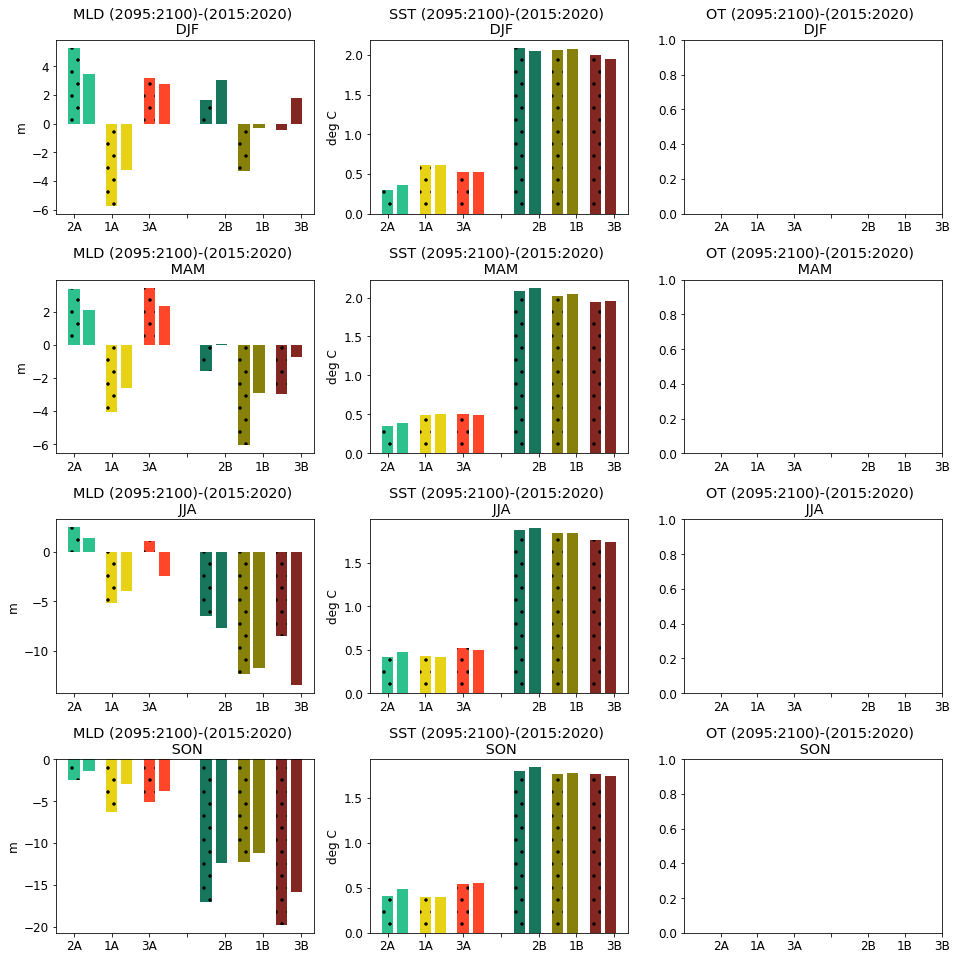

In [31]:
fact = 0.9
fig, axs = plt.subplots(4,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
axs[ind].bar(2, mld_ukesm_1A_2095_2100_DJF-mld_ukesm_1A_2015_2020_DJF, color = scendict['1A']['color'], width=0.3, hatch = '.')
axs[ind].bar(1, mld_ukesm_2A_2095_2100_DJF-mld_ukesm_2A_2015_2020_DJF, color = scendict['2A']['color'], width=0.3, hatch = '.')
axs[ind].bar(3, mld_ukesm_3A_2095_2100_DJF-mld_ukesm_3A_2015_2020_DJF, color = scendict['3A']['color'], width=0.3, hatch = '.')
axs[ind].bar(5.5, mld_ukesm_1B_2095_2100_DJF-mld_ukesm_1B_2015_2020_DJF, color = scendict['1B']['color'], width=0.3, hatch = '.')
axs[ind].bar(4.5, mld_ukesm_2B_2095_2100_DJF-mld_ukesm_2B_2015_2020_DJF, color = scendict['2B']['color'], width=0.3, hatch = '.')
axs[ind].bar(6.5, mld_ukesm_3B_2095_2100_DJF-mld_ukesm_3B_2015_2020_DJF, color = scendict['3B']['color'], width=0.3, hatch = '.')

axs[ind].bar(2.4, mld_tom_1A_2095_2100_DJF-mld_tom_1A_2015_2020_DJF, color = scendict['1A']['color'], width=0.3)
axs[ind].bar(1.4, mld_tom_2A_2095_2100_DJF-mld_tom_2A_2015_2020_DJF, color = scendict['2A']['color'], width=0.3)
axs[ind].bar(3.4, mld_tom_3A_2095_2100_DJF-mld_tom_3A_2015_2020_DJF, color = scendict['3A']['color'], width=0.3)
axs[ind].bar(5.9, mld_tom_1B_2095_2100_DJF-mld_tom_1B_2015_2020_DJF, color = scendict['1B']['color'], width=0.3)
axs[ind].bar(4.9, mld_tom_2B_2095_2100_DJF-mld_tom_2B_2015_2020_DJF, color = scendict['2B']['color'], width=0.3)
axs[ind].bar(6.9, mld_tom_3B_2095_2100_DJF-mld_tom_3B_2015_2020_DJF, color = scendict['3B']['color'], width=0.3)

ind = 3
axs[ind].bar(2, mld_ukesm_1A_2095_2100_MAM-mld_ukesm_1A_2015_2020_MAM, color = scendict['1A']['color'], width=0.3, hatch = '.')
axs[ind].bar(1, mld_ukesm_2A_2095_2100_MAM-mld_ukesm_2A_2015_2020_MAM, color = scendict['2A']['color'], width=0.3, hatch = '.')
axs[ind].bar(3, mld_ukesm_3A_2095_2100_MAM-mld_ukesm_3A_2015_2020_MAM, color = scendict['3A']['color'], width=0.3, hatch = '.')
axs[ind].bar(5.5, mld_ukesm_1B_2095_2100_MAM-mld_ukesm_1B_2015_2020_MAM, color = scendict['1B']['color'], width=0.3, hatch = '.')
axs[ind].bar(4.5, mld_ukesm_2B_2095_2100_MAM-mld_ukesm_2B_2015_2020_MAM, color = scendict['2B']['color'], width=0.3, hatch = '.')
axs[ind].bar(6.5, mld_ukesm_3B_2095_2100_MAM-mld_ukesm_3B_2015_2020_MAM, color = scendict['3B']['color'], width=0.3, hatch = '.')

axs[ind].bar(2.4, mld_tom_1A_2095_2100_MAM-mld_tom_1A_2015_2020_MAM, color = scendict['1A']['color'], width=0.3)
axs[ind].bar(1.4, mld_tom_2A_2095_2100_MAM-mld_tom_2A_2015_2020_MAM, color = scendict['2A']['color'], width=0.3)
axs[ind].bar(3.4, mld_tom_3A_2095_2100_MAM-mld_tom_3A_2015_2020_MAM, color = scendict['3A']['color'], width=0.3)
axs[ind].bar(5.9, mld_tom_1B_2095_2100_MAM-mld_tom_1B_2015_2020_MAM, color = scendict['1B']['color'], width=0.3)
axs[ind].bar(4.9, mld_tom_2B_2095_2100_MAM-mld_tom_2B_2015_2020_MAM, color = scendict['2B']['color'], width=0.3)
axs[ind].bar(6.9, mld_tom_3B_2095_2100_MAM-mld_tom_3B_2015_2020_MAM, color = scendict['3B']['color'], width=0.3)

ind = 6
axs[ind].bar(2, mld_ukesm_1A_2095_2100_JJA-mld_ukesm_1A_2015_2020_JJA, color = scendict['1A']['color'], width=0.3, hatch = '.')
axs[ind].bar(1, mld_ukesm_2A_2095_2100_JJA-mld_ukesm_2A_2015_2020_JJA, color = scendict['2A']['color'], width=0.3, hatch = '.')
axs[ind].bar(3, mld_ukesm_3A_2095_2100_JJA-mld_ukesm_3A_2015_2020_JJA, color = scendict['3A']['color'], width=0.3, hatch = '.')
axs[ind].bar(5.5, mld_ukesm_1B_2095_2100_JJA-mld_ukesm_1B_2015_2020_JJA, color = scendict['1B']['color'], width=0.3, hatch = '.')
axs[ind].bar(4.5, mld_ukesm_2B_2095_2100_JJA-mld_ukesm_2B_2015_2020_JJA, color = scendict['2B']['color'], width=0.3, hatch = '.')
axs[ind].bar(6.5, mld_ukesm_3B_2095_2100_JJA-mld_ukesm_3B_2015_2020_JJA, color = scendict['3B']['color'], width=0.3, hatch = '.')

axs[ind].bar(2.4, mld_tom_1A_2095_2100_JJA-mld_tom_1A_2015_2020_JJA, color = scendict['1A']['color'], width=0.3)
axs[ind].bar(1.4, mld_tom_2A_2095_2100_JJA-mld_tom_2A_2015_2020_JJA, color = scendict['2A']['color'], width=0.3)
axs[ind].bar(3.4, mld_tom_3A_2095_2100_JJA-mld_tom_3A_2015_2020_JJA, color = scendict['3A']['color'], width=0.3)
axs[ind].bar(5.9, mld_tom_1B_2095_2100_JJA-mld_tom_1B_2015_2020_JJA, color = scendict['1B']['color'], width=0.3)
axs[ind].bar(4.9, mld_tom_2B_2095_2100_JJA-mld_tom_2B_2015_2020_JJA, color = scendict['2B']['color'], width=0.3)
axs[ind].bar(6.9, mld_tom_3B_2095_2100_JJA-mld_tom_3B_2015_2020_JJA, color = scendict['3B']['color'], width=0.3)

ind = 9
axs[ind].bar(2, mld_ukesm_1A_2095_2100_SON-mld_ukesm_1A_2015_2020_SON, color = scendict['1A']['color'], width=0.3, hatch = '.')
axs[ind].bar(1, mld_ukesm_2A_2095_2100_SON-mld_ukesm_2A_2015_2020_SON, color = scendict['2A']['color'], width=0.3, hatch = '.')
axs[ind].bar(3, mld_ukesm_3A_2095_2100_SON-mld_ukesm_3A_2015_2020_SON, color = scendict['3A']['color'], width=0.3, hatch = '.')
axs[ind].bar(5.5, mld_ukesm_1B_2095_2100_SON-mld_ukesm_1B_2015_2020_SON, color = scendict['1B']['color'], width=0.3, hatch = '.')
axs[ind].bar(4.5, mld_ukesm_2B_2095_2100_SON-mld_ukesm_2B_2015_2020_SON, color = scendict['2B']['color'], width=0.3, hatch = '.')
axs[ind].bar(6.5, mld_ukesm_3B_2095_2100_SON-mld_ukesm_3B_2015_2020_SON, color = scendict['3B']['color'], width=0.3, hatch = '.')

axs[ind].bar(2.4, mld_tom_1A_2095_2100_SON-mld_tom_1A_2015_2020_SON, color = scendict['1A']['color'], width=0.3)
axs[ind].bar(1.4, mld_tom_2A_2095_2100_SON-mld_tom_2A_2015_2020_SON, color = scendict['2A']['color'], width=0.3)
axs[ind].bar(3.4, mld_tom_3A_2095_2100_SON-mld_tom_3A_2015_2020_SON, color = scendict['3A']['color'], width=0.3)
axs[ind].bar(5.9, mld_tom_1B_2095_2100_SON-mld_tom_1B_2015_2020_SON, color = scendict['1B']['color'], width=0.3)
axs[ind].bar(4.9, mld_tom_2B_2095_2100_SON-mld_tom_2B_2015_2020_SON, color = scendict['2B']['color'], width=0.3)
axs[ind].bar(6.9, mld_tom_3B_2095_2100_SON-mld_tom_3B_2015_2020_SON, color = scendict['3B']['color'], width=0.3)

###### sst
ind = 1+ 0
axs[ind].bar(2, sst_ukesm_1A_2095_2100_DJF-sst_ukesm_1A_2015_2020_DJF, color = scendict['1A']['color'], width=0.3, hatch = '.')
axs[ind].bar(1, sst_ukesm_2A_2095_2100_DJF-sst_ukesm_2A_2015_2020_DJF, color = scendict['2A']['color'], width=0.3, hatch = '.')
axs[ind].bar(3, sst_ukesm_3A_2095_2100_DJF-sst_ukesm_3A_2015_2020_DJF, color = scendict['3A']['color'], width=0.3, hatch = '.')
axs[ind].bar(5.5, sst_ukesm_1B_2095_2100_DJF-sst_ukesm_1B_2015_2020_DJF, color = scendict['1B']['color'], width=0.3, hatch = '.')
axs[ind].bar(4.5, sst_ukesm_2B_2095_2100_DJF-sst_ukesm_2B_2015_2020_DJF, color = scendict['2B']['color'], width=0.3, hatch = '.')
axs[ind].bar(6.5, sst_ukesm_3B_2095_2100_DJF-sst_ukesm_3B_2015_2020_DJF, color = scendict['3B']['color'], width=0.3, hatch = '.')

axs[ind].bar(2.4, sst_tom_1A_2095_2100_DJF-sst_tom_1A_2015_2020_DJF, color = scendict['1A']['color'], width=0.3)
axs[ind].bar(1.4, sst_tom_2A_2095_2100_DJF-sst_tom_2A_2015_2020_DJF, color = scendict['2A']['color'], width=0.3)
axs[ind].bar(3.4, sst_tom_3A_2095_2100_DJF-sst_tom_3A_2015_2020_DJF, color = scendict['3A']['color'], width=0.3)
axs[ind].bar(5.9, sst_tom_1B_2095_2100_DJF-sst_tom_1B_2015_2020_DJF, color = scendict['1B']['color'], width=0.3)
axs[ind].bar(4.9, sst_tom_2B_2095_2100_DJF-sst_tom_2B_2015_2020_DJF, color = scendict['2B']['color'], width=0.3)
axs[ind].bar(6.9, sst_tom_3B_2095_2100_DJF-sst_tom_3B_2015_2020_DJF, color = scendict['3B']['color'], width=0.3)

ind = 1+ 3
axs[ind].bar(2, sst_ukesm_1A_2095_2100_MAM-sst_ukesm_1A_2015_2020_MAM, color = scendict['1A']['color'], width=0.3, hatch = '.')
axs[ind].bar(1, sst_ukesm_2A_2095_2100_MAM-sst_ukesm_2A_2015_2020_MAM, color = scendict['2A']['color'], width=0.3, hatch = '.')
axs[ind].bar(3, sst_ukesm_3A_2095_2100_MAM-sst_ukesm_3A_2015_2020_MAM, color = scendict['3A']['color'], width=0.3, hatch = '.')
axs[ind].bar(5.5, sst_ukesm_1B_2095_2100_MAM-sst_ukesm_1B_2015_2020_MAM, color = scendict['1B']['color'], width=0.3, hatch = '.')
axs[ind].bar(4.5, sst_ukesm_2B_2095_2100_MAM-sst_ukesm_2B_2015_2020_MAM, color = scendict['2B']['color'], width=0.3, hatch = '.')
axs[ind].bar(6.5, sst_ukesm_3B_2095_2100_MAM-sst_ukesm_3B_2015_2020_MAM, color = scendict['3B']['color'], width=0.3, hatch = '.')

axs[ind].bar(2.4, sst_tom_1A_2095_2100_MAM-sst_tom_1A_2015_2020_MAM, color = scendict['1A']['color'], width=0.3)
axs[ind].bar(1.4, sst_tom_2A_2095_2100_MAM-sst_tom_2A_2015_2020_MAM, color = scendict['2A']['color'], width=0.3)
axs[ind].bar(3.4, sst_tom_3A_2095_2100_MAM-sst_tom_3A_2015_2020_MAM, color = scendict['3A']['color'], width=0.3)
axs[ind].bar(5.9, sst_tom_1B_2095_2100_MAM-sst_tom_1B_2015_2020_MAM, color = scendict['1B']['color'], width=0.3)
axs[ind].bar(4.9, sst_tom_2B_2095_2100_MAM-sst_tom_2B_2015_2020_MAM, color = scendict['2B']['color'], width=0.3)
axs[ind].bar(6.9, sst_tom_3B_2095_2100_MAM-sst_tom_3B_2015_2020_MAM, color = scendict['3B']['color'], width=0.3)

ind = 1+ 6
axs[ind].bar(2, sst_ukesm_1A_2095_2100_JJA-sst_ukesm_1A_2015_2020_JJA, color = scendict['1A']['color'], width=0.3, hatch = '.')
axs[ind].bar(1, sst_ukesm_2A_2095_2100_JJA-sst_ukesm_2A_2015_2020_JJA, color = scendict['2A']['color'], width=0.3, hatch = '.')
axs[ind].bar(3, sst_ukesm_3A_2095_2100_JJA-sst_ukesm_3A_2015_2020_JJA, color = scendict['3A']['color'], width=0.3, hatch = '.')
axs[ind].bar(5.5, sst_ukesm_1B_2095_2100_JJA-sst_ukesm_1B_2015_2020_JJA, color = scendict['1B']['color'], width=0.3, hatch = '.')
axs[ind].bar(4.5, sst_ukesm_2B_2095_2100_JJA-sst_ukesm_2B_2015_2020_JJA, color = scendict['2B']['color'], width=0.3, hatch = '.')
axs[ind].bar(6.5, sst_ukesm_3B_2095_2100_JJA-sst_ukesm_3B_2015_2020_JJA, color = scendict['3B']['color'], width=0.3, hatch = '.')

axs[ind].bar(2.4, sst_tom_1A_2095_2100_JJA-sst_tom_1A_2015_2020_JJA, color = scendict['1A']['color'], width=0.3)
axs[ind].bar(1.4, sst_tom_2A_2095_2100_JJA-sst_tom_2A_2015_2020_JJA, color = scendict['2A']['color'], width=0.3)
axs[ind].bar(3.4, sst_tom_3A_2095_2100_JJA-sst_tom_3A_2015_2020_JJA, color = scendict['3A']['color'], width=0.3)
axs[ind].bar(5.9, sst_tom_1B_2095_2100_JJA-sst_tom_1B_2015_2020_JJA, color = scendict['1B']['color'], width=0.3)
axs[ind].bar(4.9, sst_tom_2B_2095_2100_JJA-sst_tom_2B_2015_2020_JJA, color = scendict['2B']['color'], width=0.3)
axs[ind].bar(6.9, sst_tom_3B_2095_2100_JJA-sst_tom_3B_2015_2020_JJA, color = scendict['3B']['color'], width=0.3)

ind = 1+ 9
axs[ind].bar(2, sst_ukesm_1A_2095_2100_SON-sst_ukesm_1A_2015_2020_SON, color = scendict['1A']['color'], width=0.3, hatch = '.')
axs[ind].bar(1, sst_ukesm_2A_2095_2100_SON-sst_ukesm_2A_2015_2020_SON, color = scendict['2A']['color'], width=0.3, hatch = '.')
axs[ind].bar(3, sst_ukesm_3A_2095_2100_SON-sst_ukesm_3A_2015_2020_SON, color = scendict['3A']['color'], width=0.3, hatch = '.')
axs[ind].bar(5.5, sst_ukesm_1B_2095_2100_SON-sst_ukesm_1B_2015_2020_SON, color = scendict['1B']['color'], width=0.3, hatch = '.')
axs[ind].bar(4.5, sst_ukesm_2B_2095_2100_SON-sst_ukesm_2B_2015_2020_SON, color = scendict['2B']['color'], width=0.3, hatch = '.')
axs[ind].bar(6.5, sst_ukesm_3B_2095_2100_SON-sst_ukesm_3B_2015_2020_SON, color = scendict['3B']['color'], width=0.3, hatch = '.')

axs[ind].bar(2.4, sst_tom_1A_2095_2100_SON-sst_tom_1A_2015_2020_SON, color = scendict['1A']['color'], width=0.3)
axs[ind].bar(1.4, sst_tom_2A_2095_2100_SON-sst_tom_2A_2015_2020_SON, color = scendict['2A']['color'], width=0.3)
axs[ind].bar(3.4, sst_tom_3A_2095_2100_SON-sst_tom_3A_2015_2020_SON, color = scendict['3A']['color'], width=0.3)
axs[ind].bar(5.9, sst_tom_1B_2095_2100_SON-sst_tom_1B_2015_2020_SON, color = scendict['1B']['color'], width=0.3)
axs[ind].bar(4.9, sst_tom_2B_2095_2100_SON-sst_tom_2B_2015_2020_SON, color = scendict['2B']['color'], width=0.3)
axs[ind].bar(6.9, sst_tom_3B_2095_2100_SON-sst_tom_3B_2015_2020_SON, color = scendict['3B']['color'], width=0.3)


for i in range(0,12):
    axs[i].set_xticks(np.arange(1,8))
    axs[i].set_xticklabels(['2A','1A','3A','','2B','1B','3B'])
#
ind = 0
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n DJF'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n DJF'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n DJF')
ind = 3
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n MAM'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n MAM'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n MAM')
ind = 6
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n JJA'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n JJA'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n JJA')
ind = 9
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n SON'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n SON'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n SON')

plt.tight_layout()
#['HIST.OZONE \n LOW TEMP.', 'HIST. OZONE \n HIGH TEMP.', 'FIXED OZONE \n LOW TEMP.', '',\
# 'FIXED OZONE \n HIGH TEMP.', '1990 OZONE \n LOW TEMP.', '1990 OZONE \n HIGH TEMP.'], fontsize = 8)

In [32]:

plt.rc('font', **font)

mod = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


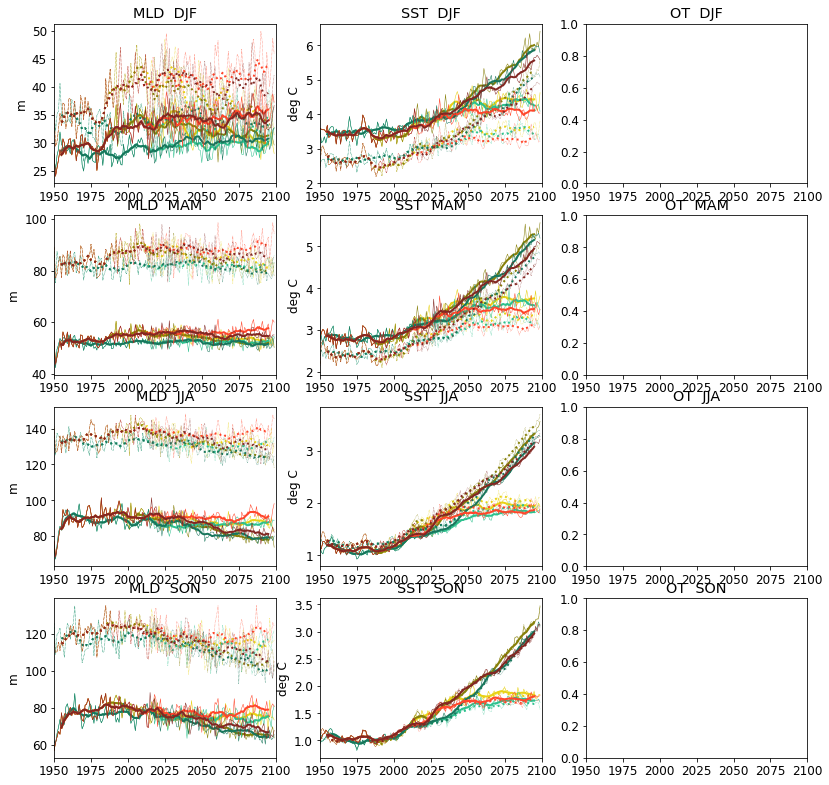

<Figure size 432x288 with 0 Axes>

In [36]:
fact = 0.9
fig, axs = plt.subplots(4,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

seas = ['DJF','MAM','JJA','SON']
    
# fact = 1.1
# fig, axs = plt.subplots(4,1, figsize=(12*fact, 18*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

for m in range(0,6):#len(models)):
    
    tmod = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_{models[m]}.nc')
    for i in range(0,4):
            ind = i*3
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
#             axs[0].legend(ncol = 3, fontsize = 10)            
        
    tmod = xr.open_dataset(f'./extracted-summary/somxl010_tom_{models[m]}A6.nc')
    for i in range(0,4):
            ind = i*3
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'], \
                        linestyle = '-', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
                        linestyle = '-', linewidth = 2)

    tmod = xr.open_dataset(f'./extracted-summary/SST_ukesm_{models[m]}.nc')
    for i in range(0,4):
            ind = i*3+1
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
#             axs[0].legend(ncol = 3, fontsize = 10)            
        
    tmod = xr.open_dataset(f'./extracted-summary/SST_tom_{models[m]}A6.nc')
    for i in range(0,4):
            ind = i*3+1
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'], \
                        linestyle = '-', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
                        linestyle = '-', linewidth = 2)

            
for i in range(0,12):
    
    axs[i].set_xlim([1950,2100])
    
ind = 0
axs[0+ind].set_title('MLD  DJF'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST  DJF'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT  DJF')
ind = 3
axs[0+ind].set_title('MLD  MAM'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST  MAM'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT  MAM')
ind = 6
axs[0+ind].set_title('MLD  JJA'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST  JJA'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT  JJA')
ind = 9
axs[0+ind].set_title('MLD  SON'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST  SON'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT  SON')
            
            
plt.tight_layout()